In [84]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 

In [86]:
I = 1j # Imaginary unit
hbar=1
J=8 # spin dimensionality
m=-np.arange(-J,J+1,1)
print(m)

[ 8  7  6  5  4  3  2  1  0 -1 -2 -3 -4 -5 -6 -7 -8]


In [198]:
def C_plus(J, m):
    return hbar*np.sqrt(J*(J+1)-m*(m+1))
    
def C_minus(J, m):
    return hbar*np.sqrt(J*(J+1)-m*(m-1))
    
def fillmat_z(J_z, J,m):
    for i in np.arange(0,len(m),1):
        J_z[i,i]=hbar*m[i]
            
def fillmat_x(J_x, J, m):
    for i in np.arange(0,len(m),1):
        for j in np.arange(0, len(m),1):
        #offdiag_p=hbar*1/2.0*(C_plus(J,m)+C_minus(J,m))
        #offdiga_m=hbar*1/2.0*(C_plus(J,m)+C_minus(J,m))
            if i==j:
                J_x[i,j]=0
                if 0<i<len(m)-1:
                    J_x[i,j+1]=0.5*C_minus(J,m[i])
                    J_x[i,j-1]=0.5*C_plus(J, m[i])
                if i==0:   
                    J_x[i,j+1]=0.5*C_minus(J,m[i])
                if i==len(m)-1:           
                    J_x[i,j-1]=0.5*C_plus(J, m[i])             

def fillmat_y(J_y, J, m):
    for i in np.arange(0,len(m),1):
        for j in np.arange(0, len(m),1):
        #offdiag_p=hbar*1/2.0*(C_plus(J,m)+C_minus(J,m))
        #offdiga_m=hbar*1/2.0*(C_plus(J,m)+C_minus(J,m))
            if i==j:
                J_y[i,j]=0
                if 0<i<len(m)-1:
                    J_y[i,j+1]+=0.5*C_plus(J,m[i+1])/I
                    J_y[i,j-1]+=-0.5*C_minus(J, m[i-1])/I
                if i==0:   
                    J_y[i,j+1]+=0.5*C_plus(J,m[i+1])/I
                if i==len(m)-1:           
                    J_y[i,j-1]+=-0.5*C_minus(J, m[i-1])/I  
            
def sqmd(Ji):
    return np.dot(np.matrix.getH(Ji),Ji)


def projection(m_proj, psi,  m):
    basis=np.zeros((len(m),len(m)), dtype=np.complex128)
    for i in np.arange(0,len(m),1):
        basis[i,i]=1
        m_proj[i]=np.dot(basis[i,:],psi)

In [464]:
def main():
    #initialization of the empty matrices 
    J_z=np.zeros((len(m),len(m)), dtype=np.complex128)
    J_x=np.zeros((len(m),len(m)), dtype=np.complex128)
    J_y=np.zeros((len(m),len(m)), dtype=np.complex128)
    #creation of the spin operators
    fillmat_z(J_z,J,m)
    fillmat_x(J_x,J,m)
    fillmat_y(J_y,J,m)
    #creation and annhiliation operators
    J_plus=J_x+I*J_y
    J_minus=J_x-I*J_y
    #Total angular momentum operator
    J2=sqmd(J_z)+sqmd(J_x)+sqmd(J_y)
    #creation of the basis for the mesaurement projection
    m_proj=np.zeros(len(m), dtype=np.complex128)
    #creation of the first state, in this case spin down
    ψ0=np.zeros(len(m),dtype=np.complex128)
    ψ0[16]=1
    
    H_SD=1*sqmd(J_z)
    H_x=J_x
    Δt=1
    T_final=30
    U=scipy.linalg.expm(-I*H_x*Δt)
    id=np.dot(np.matrix.getH(U),U)
    T_tot=np.arange(0, T_final, Δt)
    ψt2=ψ0
    for i in np.arange(1, len(T_tot), 1):
       
        Ui=scipy.linalg.expm(-I*H_x*Δt)
        Ui2=scipy.linalg.expm(-I*H_SD*Δt)
        ψt=np.dot(Ui, ψt2)
        ψt2=np.dot(Ui2,ψt)
        
    projection(m_proj, ψt2, m)
    plt.figure()
    plt.bar(m, abs(m_proj))
        
    ψ1=np.dot(U,ψ0)
    ψ1=ψ1/np.linalg.norm(ψ1)
    projection(m_proj, ψ1, m)
    #print(np.dot(Ψ0,U))
    #print(abs(m_proj[1]))

    

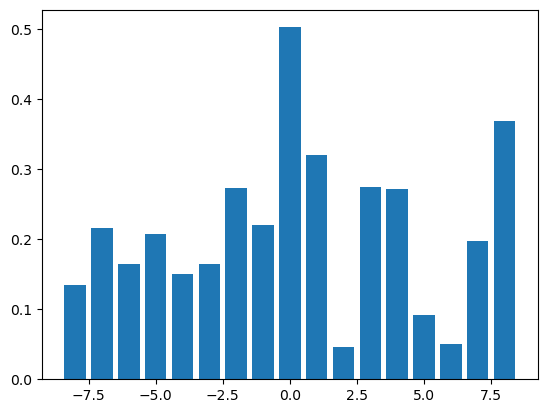

In [466]:
if __name__ == "__main__":
    main()

In [204]:
sigma_x_try1=[[0.,-0.5*C_minus(J,m[0]),0],
         [0.5*C_plus(J, m[1]),0.,-0.5*C_minus(J, m[1])],
             [0.,-0.5*C_plus(J,m[2]),0]]

print(sigma_x_try1)


[[0.0, -2.0, 0], [2.0, 0.0, -2.7386127875258306], [0.0, -2.7386127875258306, 0]]


9.994795636192322e-05